In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
df_registered = pd.read_csv('registrado.csv')
df_registered.set_index('Registrado (mil ton.)', inplace=True)
df_registered = df_registered.T
df_registered

Registrado (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.188,32.388,9.691,42.731,291.428,151.601,48.990,111.377,178.918,70.660,...,57.142,226.547,232.609,46.081,32.559,9.908,252.700,860.232,36.567,31.615
2019-02,10.381,30.378,7.378,36.026,249.430,129.537,44.726,98.614,161.936,50.796,...,46.283,228.500,195.364,38.703,24.910,10.723,246.146,773.607,30.849,30.275
2019-03,8.080,30.641,6.970,34.609,241.612,105.236,44.491,94.022,173.792,47.834,...,43.390,223.896,205.690,36.037,28.713,10.625,255.873,790.146,31.021,29.568
2019-04,11.154,32.337,7.612,40.787,252.303,110.835,43.901,91.546,176.627,45.327,...,40.824,234.132,231.354,38.430,32.660,10.593,273.299,886.929,31.437,26.940
2019-05,12.508,36.405,8.442,39.823,281.912,127.925,55.019,95.674,207.991,54.032,...,55.063,207.586,236.711,44.471,31.635,10.681,270.918,941.600,31.533,35.910
2019-06,12.126,22.499,8.835,39.957,200.213,127.138,50.942,88.927,185.784,60.657,...,56.474,228.583,215.360,37.884,35.142,7.887,256.605,817.301,26.431,33.954
2019-07,14.496,27.961,11.251,52.048,270.511,157.128,63.992,105.688,234.176,67.250,...,68.133,234.565,258.015,51.585,36.419,9.751,303.526,957.289,25.978,37.983
2019-08,16.723,32.378,11.342,53.567,281.466,164.440,64.127,104.711,226.996,70.773,...,68.642,249.519,244.870,54.306,40.300,9.654,299.284,978.990,29.860,40.046
2019-09,15.253,32.582,13.110,46.239,285.535,140.298,60.822,97.530,218.141,67.010,...,64.741,230.086,225.410,52.511,35.493,9.422,284.550,906.956,39.045,32.647
2019-10,16.531,42.703,13.195,51.066,328.259,168.407,65.182,99.651,234.939,81.128,...,71.269,233.136,252.849,59.472,38.489,11.160,307.576,980.948,45.213,39.065


In [6]:
df_previsto = pd.read_csv('previsto.csv')
df_previsto.set_index('Previsto (mil ton.)', inplace=True)
df_previsto = df_previsto.T
df_previsto

Previsto (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,9.965322,28.022175,10.510574,37.427200,257.158142,169.419113,43.084301,96.071182,163.526047,75.067528,...,56.605152,223.335358,210.276398,40.917717,31.292349,7.210617,232.906769,913.917786,31.484152,37.540215
2019-02,9.401869,29.108173,9.314430,34.934746,237.604614,141.289215,41.249916,95.852623,162.339279,70.113174,...,55.091358,221.227386,205.357574,41.125336,31.023626,7.299311,233.068436,915.398438,31.841486,35.748211
2019-03,9.238652,28.738781,9.245779,34.576851,248.910767,138.988541,42.884674,99.670052,174.263779,74.844116,...,58.500526,223.032715,225.304596,41.435265,31.811789,7.399745,250.586151,920.352661,30.861835,37.017727
2019-04,10.371523,28.355597,9.422216,34.946239,251.026566,139.961945,46.262550,104.050865,193.623032,78.589615,...,62.772682,223.580002,232.054535,41.650776,34.034172,7.549856,246.223236,920.492981,30.917688,39.273750
2019-05,11.178068,27.497522,10.129442,35.786209,249.647003,156.533051,45.242527,103.464622,186.039871,81.817757,...,65.887535,225.722076,228.093796,40.362751,36.274406,7.402041,240.452240,912.606445,28.951004,42.692589
2019-06,11.490921,27.625402,11.195783,36.851616,245.846512,172.032776,45.663242,103.441696,180.510986,85.867020,...,68.084702,228.457397,235.493896,39.764565,37.147503,7.228830,242.655640,911.046082,28.546436,45.813046
2019-07,11.564381,28.393085,12.041863,39.121929,259.318573,184.646210,50.629784,107.926926,189.421173,89.978531,...,70.817726,229.463013,232.633011,40.998714,38.487091,7.883653,238.102951,909.039856,30.946030,49.416676
2019-08,11.779588,29.104832,13.221583,39.661758,262.794128,190.442337,54.026325,109.703773,202.771790,94.588020,...,72.645645,234.529587,233.230667,43.791176,37.820686,8.545144,241.403168,909.942871,30.275249,50.277225
2019-09,12.063978,34.390011,13.966028,42.883011,266.018494,197.386566,50.901031,110.681595,199.535126,93.508057,...,74.415054,222.066803,237.644073,43.352646,39.871845,8.637756,240.327606,913.238281,30.911663,53.363068
2019-10,11.852197,34.292507,15.351657,41.521587,272.648560,196.345184,51.563313,109.632301,204.290863,96.298309,...,73.905334,220.488037,238.199020,42.932224,38.769894,9.115330,239.733185,913.202148,32.735119,55.318928


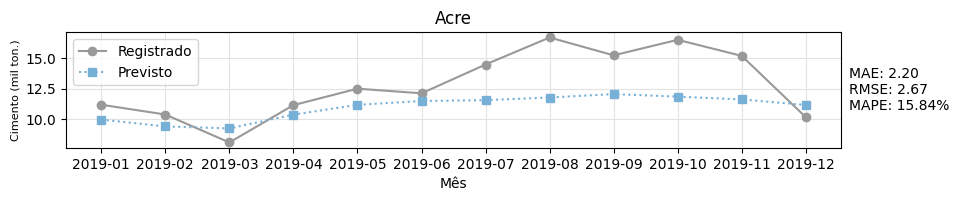

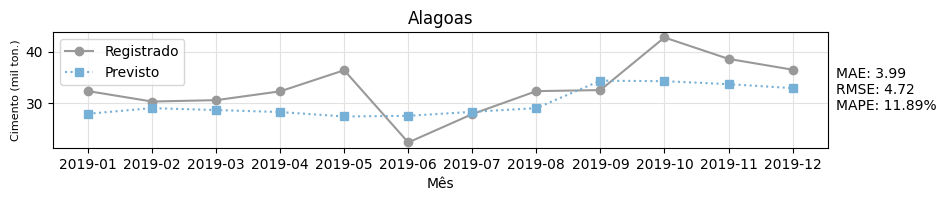

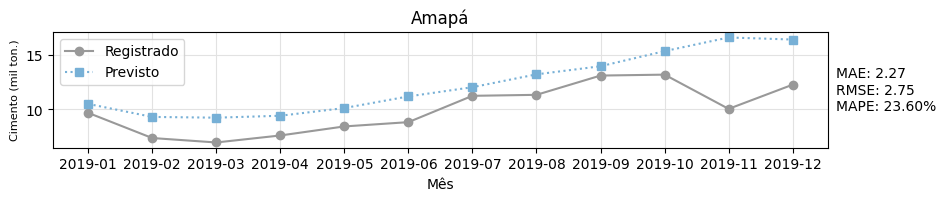

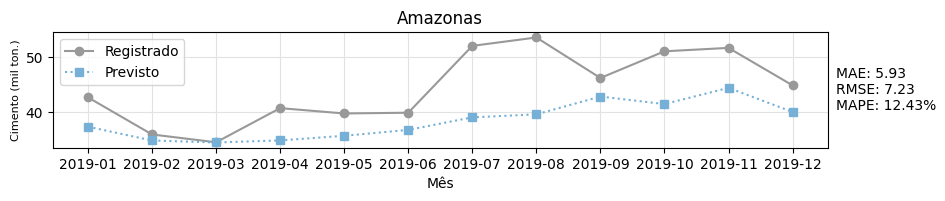

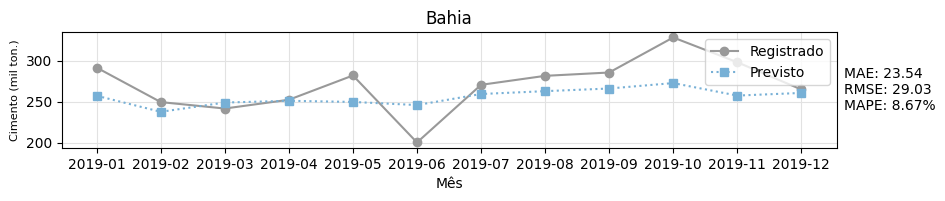

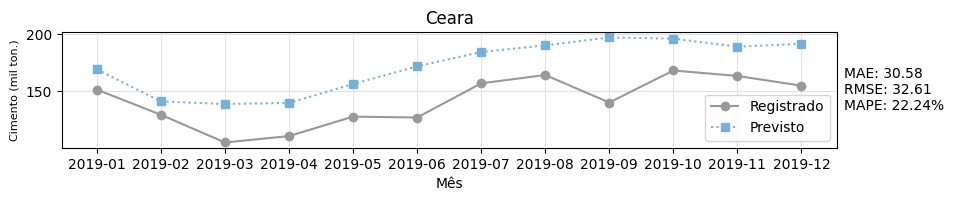

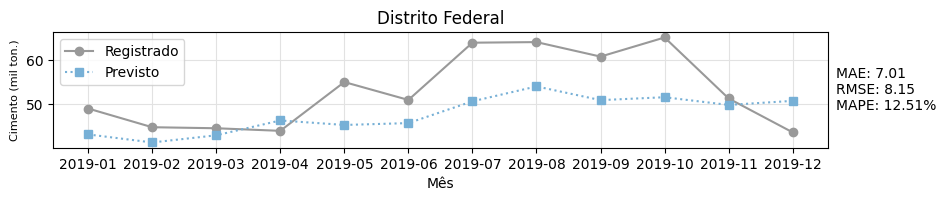

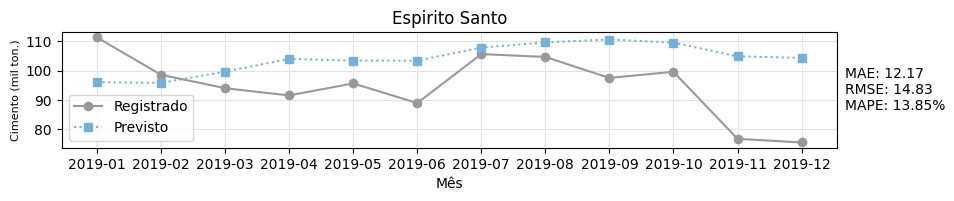

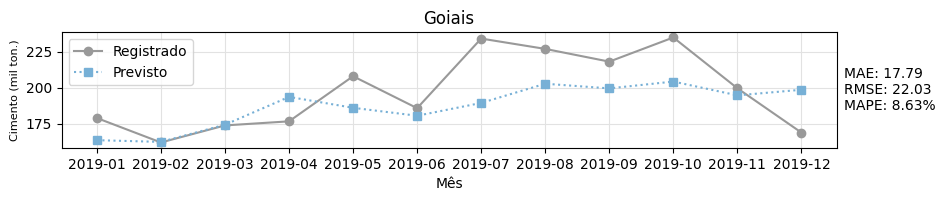

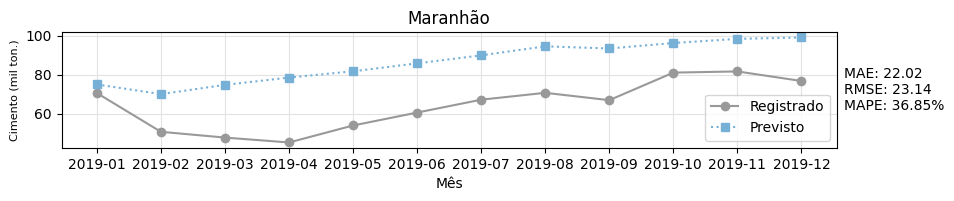

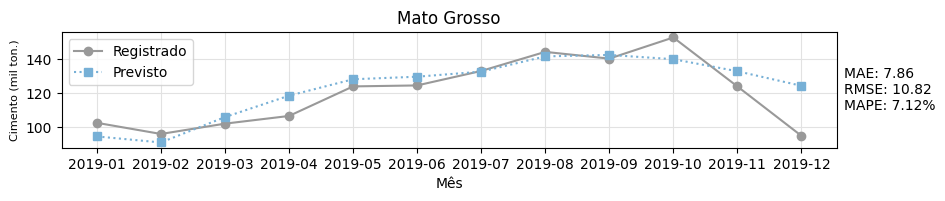

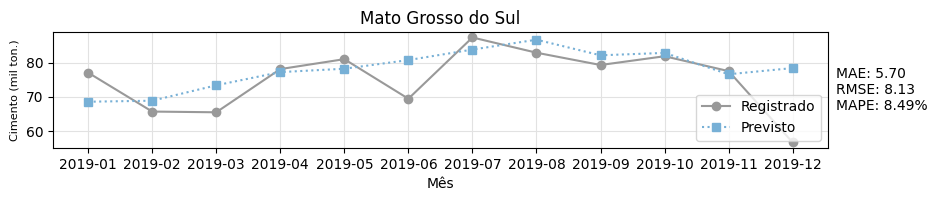

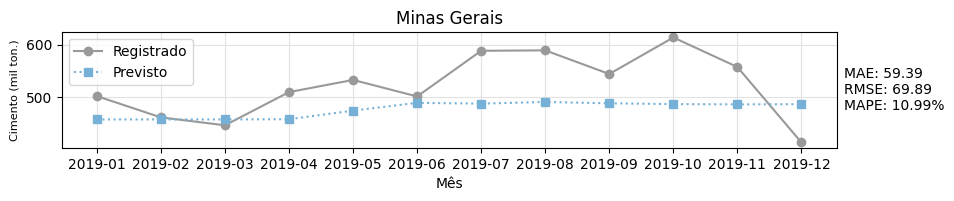

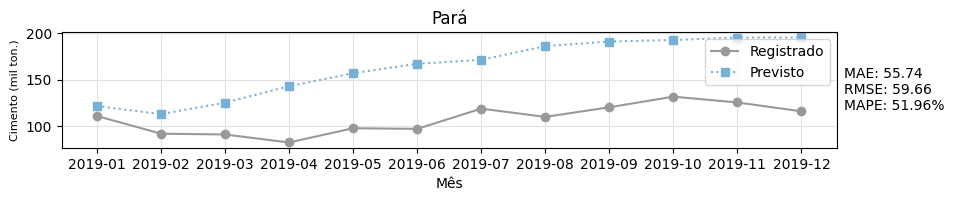

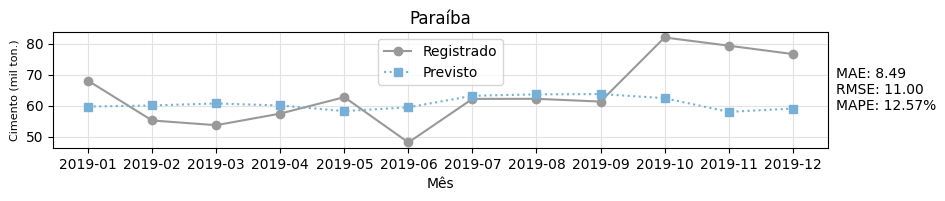

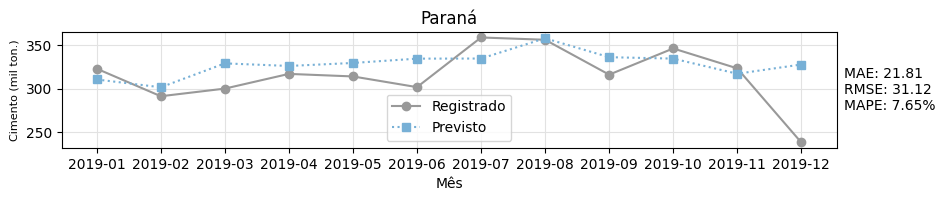

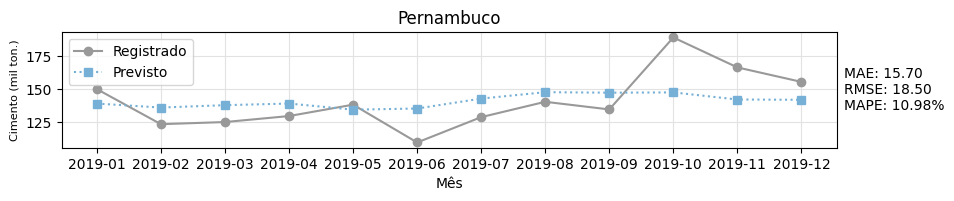

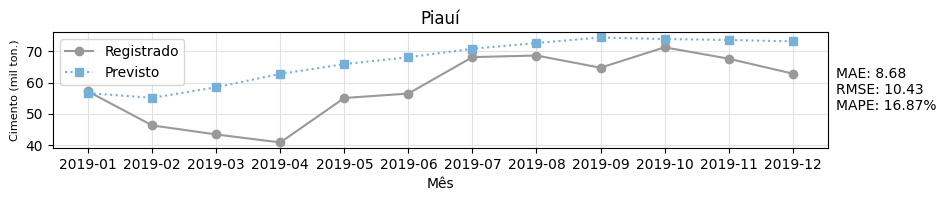

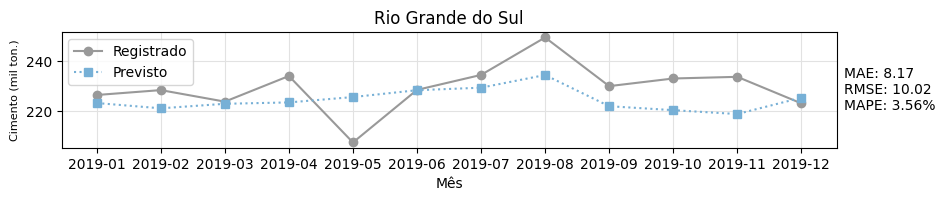

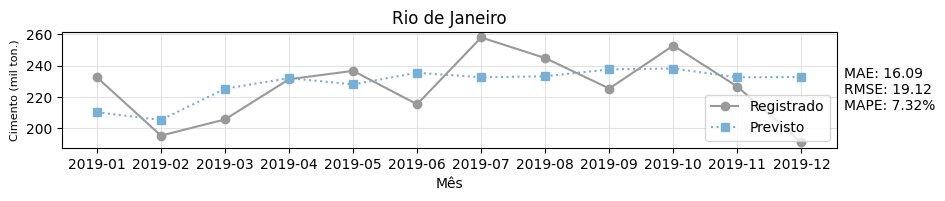

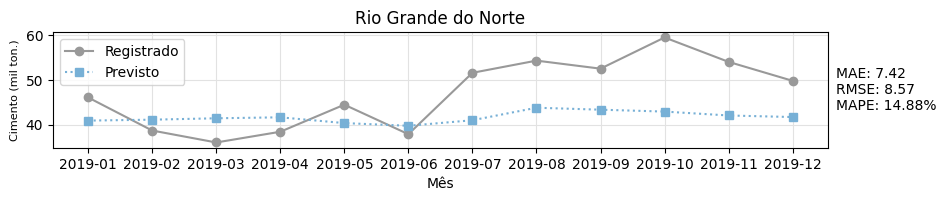

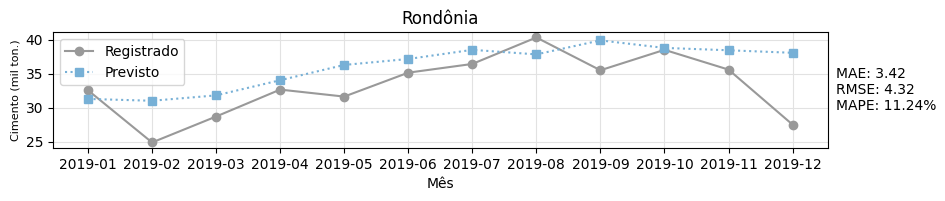

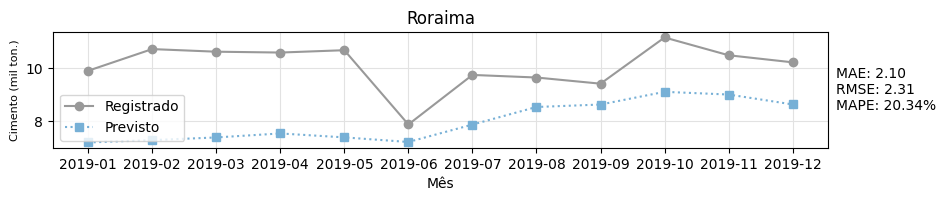

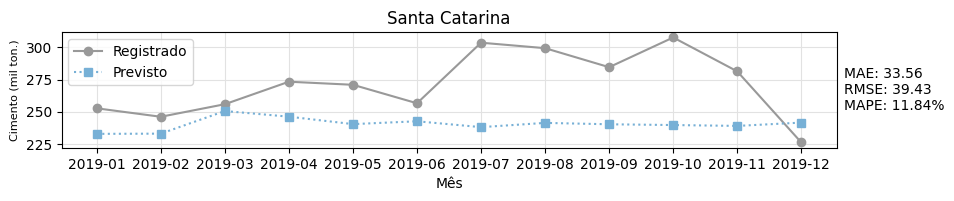

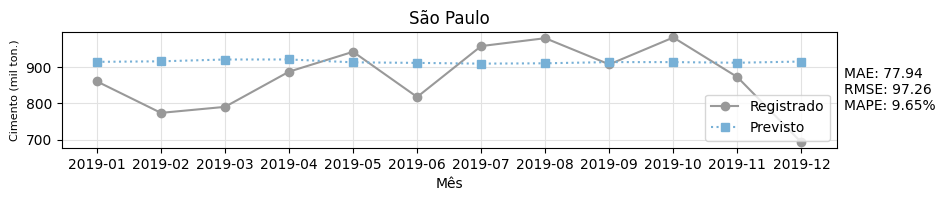

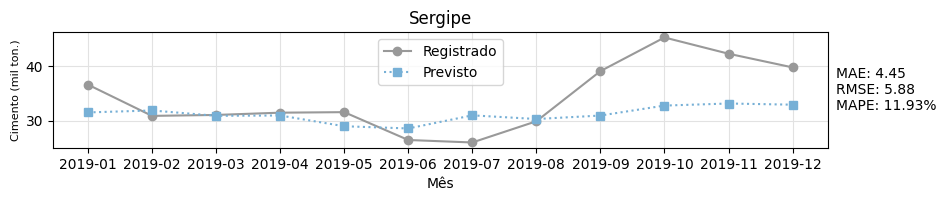

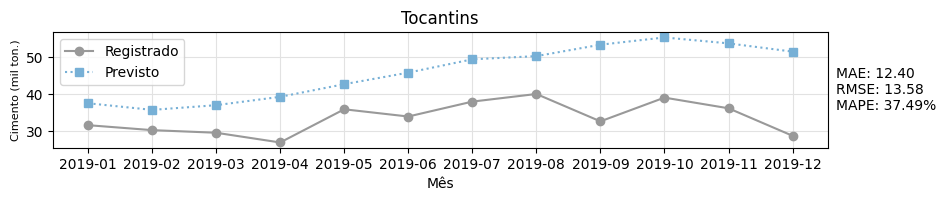

In [7]:
def plot_time_series(df_registered, df_previsto):
    states = df_registered.columns  

    for state in states:
        plt.figure(figsize=(10, 1.5))
        plt.plot(df_registered.index, df_registered[state], 
                 label='Registrado', marker='o', color='#999999') 
        plt.plot(df_previsto.index, df_previsto[state], 
                 label='Previsto', marker='s', linestyle='dotted', color='#77B0D6') 

        actual = df_registered[state]
        predicted = df_previsto[state]

        mae = mean_absolute_error(actual, predicted)
        rmse = mean_squared_error(actual, predicted, squared=False)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        info_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%' 

        plt.text(1.01, 0.5, info_text, transform=plt.gca().transAxes, 
                 fontsize=10, verticalalignment='center')

        plt.xlabel('Mês', fontsize=10)  
        plt.ylabel('Cimento (mil ton.)', fontsize=8) 
        plt.title(f'{state}')
        plt.legend()
        plt.grid(True, color='#E2E2E2') 
        plt.show()


plot_time_series(df_registered, df_previsto)

In [8]:
def plot_error_distribution(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    all_errors = errors.values.flatten()
    ranges = [float('-inf'), -50, -30, -10, 10, 30, 50, float('inf')]
    error_counts = pd.cut(all_errors, ranges).value_counts().sort_index()
    labels = ['< -50%', '-50% to -30%', '-30% to -10%', '-10% to 10%', '10% to 30%', '30% to 50%', '> 50%']

    plt.figure(figsize=(8, 6))
    bars = plt.barh(labels, error_counts, color='#77B0D6')
    plt.xlabel('Número de previsões')
    plt.ylabel('Intervalo de erros')
    plt.title('Distribuição agregada de erros')
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{(count / sum(error_counts)) * 100:.1f}%", 
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

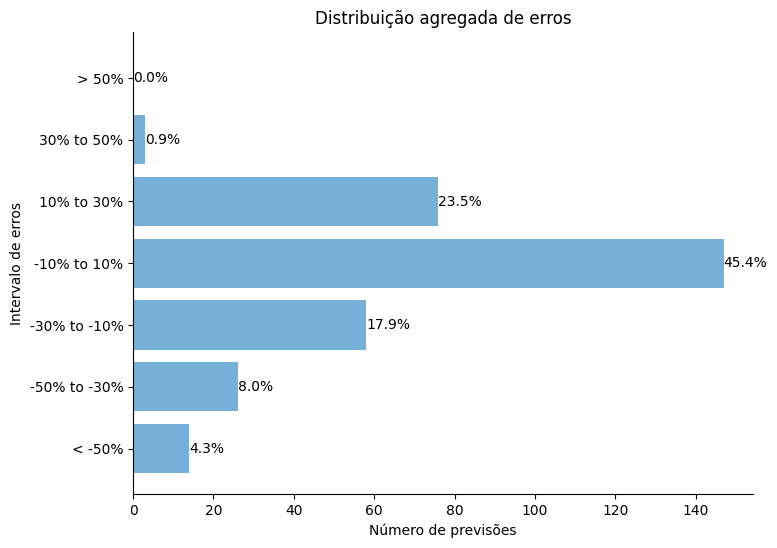

In [9]:
plot_error_distribution(df_registered, df_previsto)

In [10]:
def calculate_errors_summary(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    
    rmse_values = []
    mae_values = []
    mape_values = []

    for column in df_registered.columns:
        actual = df_registered[column]
        predicted = df_previsto[column]

        rmse = mean_squared_error(actual, predicted, squared=False)
        mae = mean_absolute_error(actual, predicted)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        rmse_values.append(round(rmse,2))
        mae_values.append(round(mae,2))
        mape_values.append(round(mape,2))

    summary = {
        'RMSE': rmse_values,
        'MAE': mae_values,
        'MAPE': mape_values
    }

    summary_df = pd.DataFrame(summary, index=df_registered.columns)
    mean_row = {
        'RMSE': round(sum(rmse_values) / len(rmse_values), 2),
        'MAE': round(sum(mae_values) / len(mae_values), 2),
        'MAPE': round(sum(mape_values) / len(mape_values), 2)
    }
    summary_df.loc['Mean'] = mean_row  

    return summary_df

In [11]:
sumario_erro = calculate_errors_summary(df_registered, df_previsto)
sumario_erro

,RMSE,MAE,MAPE
Registrado (mil ton.),,,
Acre,2.67,2.20,15.84
Alagoas,4.72,3.99,11.89
Amapá,2.75,2.27,23.60
Amazonas,7.23,5.93,12.43
Bahia,29.03,23.54,8.67
Ceara,32.61,30.58,22.24
Distrito Federal,8.15,7.01,12.51
Espirito Santo,14.83,12.17,13.85
Goiais,22.03,17.79,8.63
